In [16]:
import numpy as np

In [17]:
maze = np.genfromtxt('maze_10x10.csv', delimiter=',', dtype=str)
print(maze.shape)
print(maze)

(10, 10)
[['w' 'w' 'w' 'c' 'w' 'w' 'w' 'w' 'w' 'w']
 ['w' 'w' 'w' 'c' 'c' 'c' 'c' 'c' 'c' 'w']
 ['w' 'w' 'c' 'c' 'w' 'w' 'c' 'w' 'c' 'w']
 ['w' 'c' 'c' 'w' 'w' 'w' 'w' 'w' 'c' 'w']
 ['w' 'c' 'w' 'w' 'c' 'c' 'c' 'w' 'w' 'w']
 ['w' 'c' 'c' 'c' 'c' 'w' 'c' 'c' 'w' 'w']
 ['w' 'c' 'w' 'c' 'w' 'w' 'w' 'c' 'c' 'w']
 ['w' 'c' 'w' 'c' 'w' 'w' 'c' 'c' 'w' 'w']
 ['w' 'c' 'w' 'c' 'c' 'w' 'w' 'c' 'c' 'w']
 ['w' 'w' 'w' 'w' 'w' 'w' 'w' 'w' 'c' 'w']]


In [18]:
def availabe_actions(position, maze):
    """
    Returns the available actions to do
    
    Parameters:
    A list with the current position and the maze in a (nxn) matrix
    Returns:
    A list with the actions to do
    """
    actions = []
    if position[0]+1<maze.shape[0]:
        if maze[position[0]+1,position[1]]!='w':
            actions.append([1,0])
    
    if position[0]-1<maze.shape[0]:
        if maze[position[0]-1,position[1]]!='w':
            actions.append([-1,0])
    
    if position[1]+1<maze.shape[1]:
        if maze[position[0],position[1]+1]!='w':
            actions.append([0,1])
    
    if position[1]-1<maze.shape[1]:
        if maze[position[0],position[1]-1]!='w':
            actions.append([0,-1])
    return actions

def apply_action(position, action):
    """
    Returns the new current position in the maze after apply an action
    
    Parameters:
    position: a list with the current position
    action: the vector action to do (ej. Down action [0,1])
    
    Returns:
    
    """
    return [position[0]+action[0], position[1]+action[1]]

def verify_end(node, maze):
    end = False
    if node.position == [maze.shape[0]-1, maze.shape[1]-2]:
        end = True
    return end

def initial_position(maze):
    i_pos = [0,1]
    for i in range(maze.shape[1]):
        if maze[0,i]=="c":
            i_pos[1] = i
            break
    return i_pos
 
class node(object):
    """
    position
    list of previous actions
    """
    def __init__(self, position, actions, count, final_position):
        self.position = position
        self.actions = actions
        self.count = count
        self.final_position = final_position
    def increase_count(self):
        self.count = self.count+1
    def get_count(self):
        return self.count
    def __gt__(self, other):
        distance_heuristic = np.sqrt((self.position[0]-self.final_position[0])**2.+(self.position[1]-self.final_position[1])**2.)
        other_distance_heuristic = np.sqrt((other.position[0]-other.final_position[0])**2.+(other.position[1]-other.final_position[1])**2.)
        return self.count + distance_heuristic > other.count + other_distance_heuristic
    def __lt__(self, other):
        distance_heuristic = np.sqrt((self.position[0]-self.final_position[0])**2.+(self.position[1]-self.final_position[1])**2.)
        other_distance_heuristic = np.sqrt((other.position[0]-other.final_position[0])**2.+(other.position[1]-other.final_position[1])**2.)
        return self.count + distance_heuristic < other.count + other_distance_heuristic

In [19]:
def transform_actions(x):
    if x == [0,1]:
        return "R"
    if x == [0,-1]:
        return "L"
    if x == [1,0]:
        return "D"
    if x == [-1,0]:
        return "U"

In [20]:
import queue

S = node(initial_position(maze), actions=[], count=0, final_position=[maze.shape[0]-1, maze.shape[1]-2])
print(S.position)
frontier= queue.PriorityQueue()
frontier.put(S)
current_node = frontier.get()
while not (verify_end(current_node, maze)):
    for action in availabe_actions(current_node.position, maze):
        new_actions = [x for x in current_node.actions]
        new_actions.append(action)
        new_node = node(apply_action(current_node.position, action), new_actions, current_node.get_count()+1, [maze.shape[0]-1, maze.shape[1]-2])
        frontier.put(new_node)
    current_node = frontier.get()
print(frontier.qsize(), current_node.position, [transform_actions(x) for x in current_node.actions])

[0, 3]
4091 [9, 8] ['D', 'D', 'L', 'D', 'L', 'D', 'D', 'R', 'R', 'R', 'U', 'R', 'R', 'D', 'R', 'D', 'D', 'D', 'R', 'D']


In [21]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def animate_solution(maze, current_node, algorithm):
    copy_maze = np.copy(maze)
    position_maze = initial_position(maze)
    copy_maze[position_maze[0], position_maze[1]] = '+'
    c_action = 0
    snapshots = []
    for action in current_node.actions:
        position_maze = apply_action(position_maze, action)
        copy_maze[position_maze[0], position_maze[1]] = '+'
        num_maze = np.where(copy_maze=='w',0,1) + np.where(copy_maze=='+',1,0)
        snapshots.append(num_maze)
        c_action += 1
        
    nSeconds = 8
    fps = int(len(current_node.actions)/nSeconds)
    fig = plt.figure( figsize=(8,8) )

    a = snapshots[0]
    im = plt.imshow(a, cmap='gray')

    def animate_func(i):
        if i % fps == 0:
            print( '.', end ='' )

        im.set_array(snapshots[i])
        return [im]

    anim = animation.FuncAnimation(
                                   fig, 
                                   animate_func, 
                                   frames = nSeconds * fps,
                                   interval = 1000 / fps, # in ms
                                   )

    anim.save(algorithm+'_result.mp4', fps=fps, extra_args=['-vcodec', 'libx264'])

    print('Done!')

.........Done!


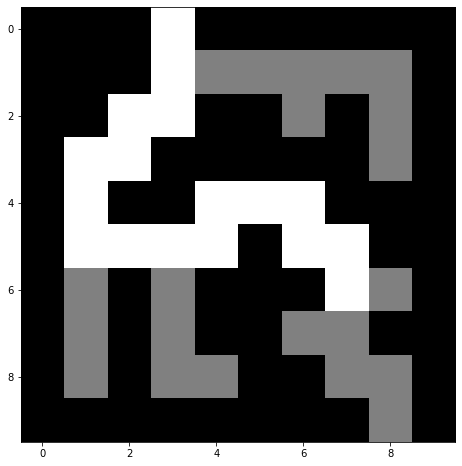

In [22]:
animate_solution(maze, current_node, 'test')

In [13]:
import tkinter as tk
from tkinter import ttk
from tkinter import filedialog as fd
from tkinter.messagebox import showinfo
from tkinter import *
from tkvideo import tkvideo

# create the root window
root = tk.Tk()
root.title('Bienvenido al laboratorio de IA')
Label(root,
          text ="Seleccione un laberinto a resolver",font=("Helvetica", 9)).pack()
root.resizable(False, False)
root.geometry('300x150')


def select_file():
    filetypes = (
        ('text files', '*.csv'),
        ('All files', '*.*')
    )

    filename = fd.askopenfilename(
        title='Abrir un archivo',
        initialdir='./',
        filetypes=filetypes)
    
    maze = str(np.genfromtxt(filename, delimiter=',', dtype=str))
    
    
    def charge_giff(imagefilename='./animation.gif'):
        print('hola')
        gif1 = PhotoImage(file='./animation.gif')
        newWindow2 = Toplevel(newWindow)
        my_label = Label(newWindow2)
        my_label.pack()
        player = tkvideo("./test_anim.mp4", my_label, loop = 1)
        player.play()
        Label(newWindow2,
          text ="Tiempo: X",font=("Helvetica", 9)).pack()
        Label(newWindow2,
          text ="Espacio: Y",font=("Helvetica", 9)).pack()

    
    
    # Toplevel object which will
    # be treated as a new window
    newWindow = Toplevel(root)
 
    # sets the title of the
    # Toplevel widget
    newWindow.title("New Window")
 
    # sets the geometry of toplevel
    newWindow.geometry("300x300")
 
    # A Label widget to show in toplevel
    Label(newWindow,
          text ="Seleccione un solucionador").pack()
    b1 = Button(newWindow,text = "A*",command = charge_giff,activeforeground = "red",activebackground = "pink",pady=10)  
  
    b2 = Button(newWindow, text = "Búsqueda greedy",activeforeground = "blue",activebackground = "pink",pady=10)  

    b3 = Button(newWindow, text = "Búsqueda de costo uniforme",activeforeground = "green",activebackground = "pink",pady = 10)  

    b4 = Button(newWindow, text = "Profundidad iterativa",activeforeground = "yellow",activebackground = "pink",pady = 10)
    
    b5 = Button(newWindow, text = "Anchura",activeforeground = "yellow",activebackground = "pink",pady = 10)
    
    b6 = Button(newWindow, text = "Profundidad",activeforeground = "yellow",activebackground = "pink",pady = 10)

    b1.pack()  

    b2.pack()  

    b3.pack()  

    b4.pack()
    
    b5.pack()  

    b6.pack()
    


# open button
open_button = ttk.Button(
    root,
    text='Abrir un archivo',
    command=select_file
)

open_button.pack(expand=True)

# run the application
root.mainloop()

hola


Exception in thread Thread-12:
Traceback (most recent call last):
  File "/home/kennet/anaconda3/envs/data/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/home/kennet/anaconda3/envs/data/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/home/kennet/anaconda3/envs/data/lib/python3.8/site-packages/tkvideo/tkvideo.py", line 51, in load
    label.config(image=frame_image)
  File "/home/kennet/anaconda3/envs/data/lib/python3.8/tkinter/__init__.py", line 1646, in configure
    return self._configure('configure', cnf, kw)
  File "/home/kennet/anaconda3/envs/data/lib/python3.8/tkinter/__init__.py", line 1636, in _configure
    self.tk.call(_flatten((self._w, cmd)) + self._options(cnf))
_tkinter.TclError: invalid command name ".!toplevel.!toplevel.!label"


hola


Exception in thread Thread-37:
Traceback (most recent call last):
  File "/home/kennet/anaconda3/envs/data/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/home/kennet/anaconda3/envs/data/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/home/kennet/anaconda3/envs/data/lib/python3.8/site-packages/tkvideo/tkvideo.py", line 51, in load
    label.config(image=frame_image)
  File "/home/kennet/anaconda3/envs/data/lib/python3.8/tkinter/__init__.py", line 1646, in configure
    return self._configure('configure', cnf, kw)
  File "/home/kennet/anaconda3/envs/data/lib/python3.8/tkinter/__init__.py", line 1636, in _configure
    self.tk.call(_flatten((self._w, cmd)) + self._options(cnf))
_tkinter.TclError: invalid command name ".!toplevel.!toplevel2.!label"


In [7]:
#!pip install tkVideo
from tkvideo import tkvideo
from tkinter import *
root = Tk()
my_label = Label(root)
my_label.pack()
player = tkvideo("./test_anim.mp4", my_label, loop = 0)
player.play()

root.mainloop()